<a href="https://colab.research.google.com/github/S3IFK/Practise/blob/main/TimeSeriesPractise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('airline-traffic.csv', header=None)

In [4]:
data.columns = ['Month', 'Passengers']

In [6]:
data = data.set_index('Month')

In [7]:
data.head()

,Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


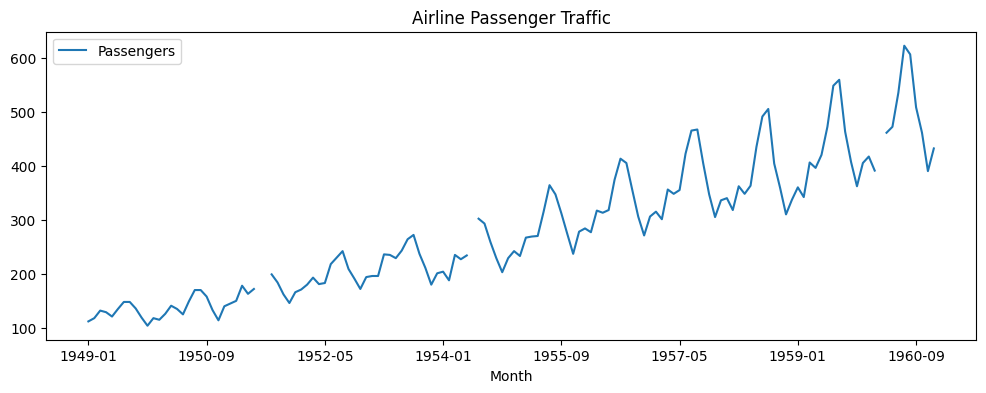

In [8]:
data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger Traffic')
plt.show(block=False)

#### Missing Value Treatment

## Mean Imputation

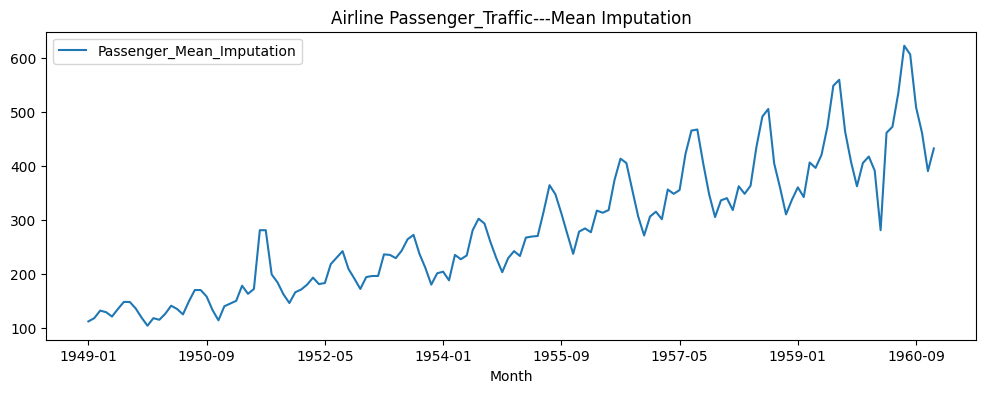

In [10]:
data = data.assign(Passenger_Mean_Imputation=data.Passengers.fillna(data.Passengers.mean()))
data[['Passenger_Mean_Imputation']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger_Traffic---Mean Imputation')
plt.show(block=False)

### Linear Interpolation

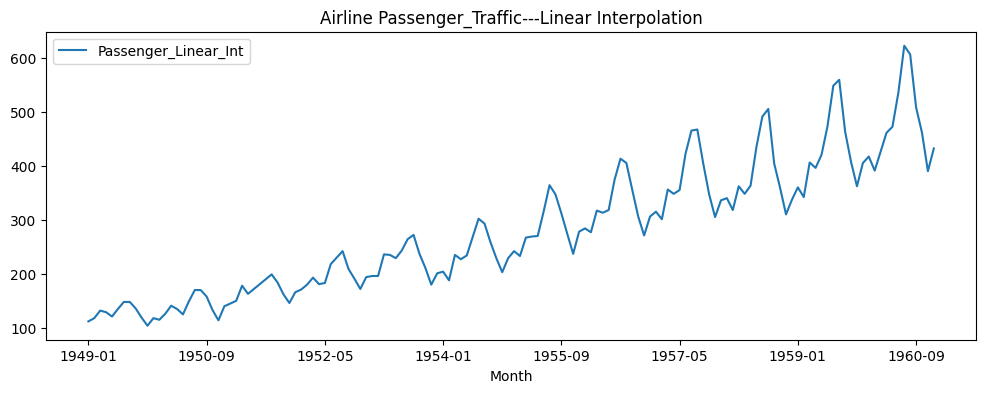

In [12]:
data = data.assign(Passenger_Linear_Int=data.Passengers.interpolate(method='linear'))
data[['Passenger_Linear_Int']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger_Traffic---Linear Interpolation')
plt.show(block=False)

### BoxPlot and InterQuantile Range

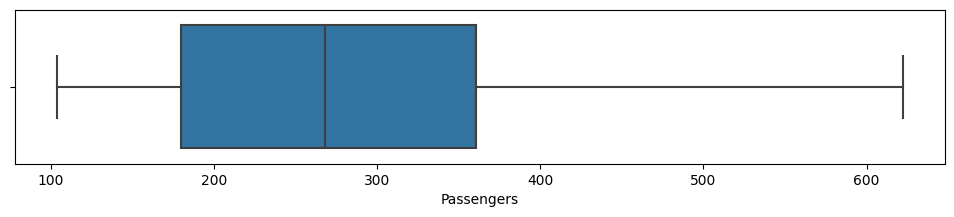

In [13]:
import seaborn as sns
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x=data['Passengers'])

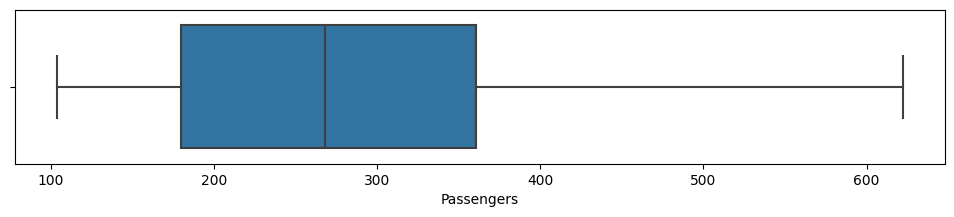

In [15]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x=data['Passengers'],whis=1.5)

In [18]:
data.drop(columns=['Passenger_Mean_Imputation','Passenger_Linear_Int'], inplace=True)

In [19]:
data.head()

,Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [21]:
data.isna().sum()

Passengers    4
dtype: int64

In [22]:
data.dropna()

,Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
...,...
1960-08,606.0
1960-09,508.0
1960-10,461.0


In [23]:
data.isna().sum()

Passengers    4
dtype: int64

##### Time Series Decomposition

###### Additive Seasonal Decomposition

In [20]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize']=12,8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: ignored